In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt


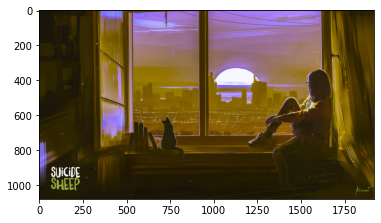

In [ ]:
image = cv.imread('/content/drive/MyDrive/New folder/alena-aenami-0011.jpg')
# cv.imshow(image)
plt.imshow(image)
plt.show()
cv.destroyAllWindows() 

In [ ]:
height = int(image.shape[0])
width = int(image.shape[0])
print(height, width )

1080 1080


In [ ]:
# storing the image named image into a file path ....editedimage.jpg
cv.imwrite('/content/drive/MyDrive/New folder/edited image.jpg',image)

True

In [ ]:
face_classifier = cv.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
image = cv.imread('/content/download (1).jpg')

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [ ]:
faces = face_classifier.detectMultiScale(gray , 1.3,5)

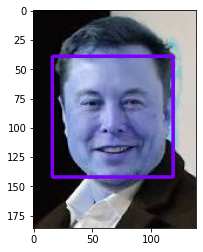

In [ ]:
for (x,y,w,h) in faces :
  cv.rectangle(image , (x,y) , (x+w , y+h) , (127,0,255) ,2)
  plt.imshow(image)
  plt.show()

Eye Haar Cl;assifier

391 185 182 182


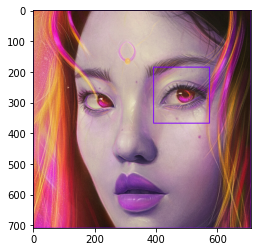

134 217 147 147


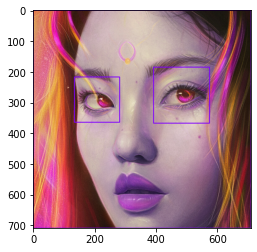

In [ ]:
eye_classifier = cv.CascadeClassifier('/content/haarcascade_eye.xml') 
image = cv.imread('/content/arthur-henri-eu-sou-a-noite.jpg')
gray = cv.cvtColor(image , cv.COLOR_BGR2GRAY) 

faces = face_classifier.detectMultiScale(gray , 1.3,5)

for (x,y,w,h) in faces :
  cv.rectangle(image , (x,y) , (x+w , y+h) , (127,0,255) , 2)
  # plt.imshow(image)
  # plt.show()

  roi_gray = gray[y:y+h , x: x+w]
  roi_colour = image[y:y+h , x:x+w]

  eyes = eye_classifier.detectMultiScale(roi_gray)

  for (ex,ey,ew,eh) in eyes :
    print(ex,ey,ew,eh)
    cv.rectangle(roi_colour , (ex,ey) , (ex+ew , ey+eh) , (127,0,255) , 2)
    plt.imshow(roi_colour)
    plt.show() 

live face & eye detection

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

image_file = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
image = cv2.imread(image_file)

48 65 57 57


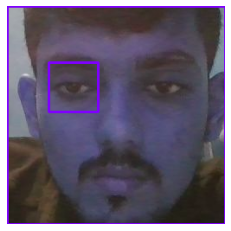

148 62 64 64


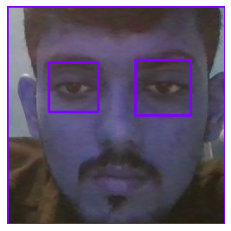

In [ ]:
eye_classifier = cv.CascadeClassifier('/content/haarcascade_eye.xml') 
gray = cv.cvtColor(image , cv.COLOR_BGR2GRAY) 

faces = face_classifier.detectMultiScale(gray , 1.3,5)

for (x,y,w,h) in faces :
  cv.rectangle(image , (x,y) , (x+w , y+h) , (127,0,255) , 2)
  # plt.imshow(image)
  # plt.show()

  roi_gray = gray[y:y+h , x: x+w]
  roi_colour = image[y:y+h , x:x+w]

  eyes = eye_classifier.detectMultiScale(roi_gray)

  for (ex,ey,ew,eh) in eyes :
    print(ex,ey,ew,eh)
    cv.rectangle(roi_colour , (ex,ey) , (ex+ew , ey+eh) , (127,0,255) , 2)
    plt.imshow(roi_colour)
    plt.axis('off')
    plt.show() 